<a href="https://colab.research.google.com/github/lokesh10111/Practical_Statistics_for_Ml/blob/main/Chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [7]:
file_path='/content/drive/MyDrive/Projects/Ecommerce AB testing/ab_data.csv'

In [8]:
df=pd.read_csv(file_path)

In [9]:
df.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [11]:
def remove_duplicates(df, unique_key):
    # Drop duplicates based on the unique key (user_id in this case)
    df.drop_duplicates(subset=unique_key, keep="first", inplace=True)
    df.reset_index(drop=True, inplace=True)

remove_duplicates(df, "user_id")

# Print the DataFrame after removing duplicates
print(df.head())
print(df.shape)

   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1
(290584, 5)


In [14]:
def permutation(dataframe,data_col,grouping_col,iterations,statistic_function): #resamples without replacement and outputs a dictionary
  output={}

  groups=dataframe[grouping_col].value_counts().index
  values=dataframe[grouping_col].value_counts()

  for x in range(iterations):
    for i in groups:
      sample_amount=dataframe[grouping_col].value_counts()[i]
      sample_data=dataframe[data_col].sample(sample_amount,replace=False).to_list()
      sample_metric=statistic_function(sample_data)

      try:
        output[i].append(sample_metric)
      except(KeyError,AttributeError):
        output[i]=[sample_metric]

  final_output=pd.DataFrame(output)
  return final_output



In [23]:
permutation_Data=permutation(df,"converted","group",10000,np.mean)
permutation_Data

,treatment,control
0,0.120088,0.120676
1,0.120280,0.119058
2,0.119668,0.119003
3,0.119957,0.118046
4,0.119324,0.119010
...,...,...
9995,0.120067,0.120338
9996,0.119111,0.120056
9997,0.120487,0.119898
9998,0.119352,0.119698


<Axes: >

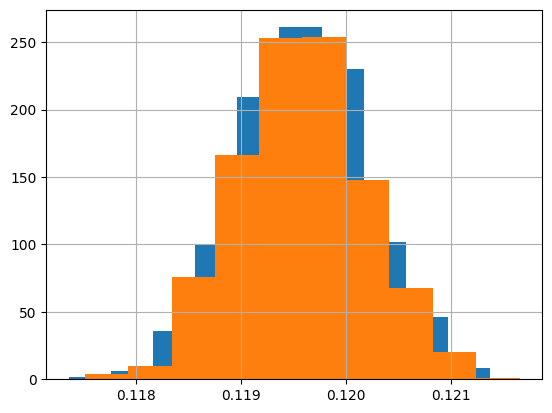

In [22]:
permutation_Data['treatment'].hist()
permutation_Data['control'].hist()